# K-Vecinos más cercanos - Regresión

- Vamos a hacer una regresión para calcular cuál sería el precio de un vehículo en función de los kilometros recorridos que podría tener el vehículo.
- Para ello, vamos a verificar los vecinos mas cercanos, en este caso carros, que están en ese rango de kilometraje y por ende un rango de precio.
- Vamos a usar un ejemplo de K=3 por ejemplo. Y al saber el precio de cada uno de ellos, sacamos el promedio y con esto, sabremos el resultado de nuestra regresión.

# Visualización y Procesamiento de los datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
# Carga de datos
carros = pd.read_csv("./carros.csv")
carros

,kms,precio
0,6048,1385956
1,11825,1297582
2,20000,1000000
3,21048,1284844
4,21549,685300
5,21613,1342000
6,24184,1207484
7,25000,1005000
8,27027,655402
9,27863,814000


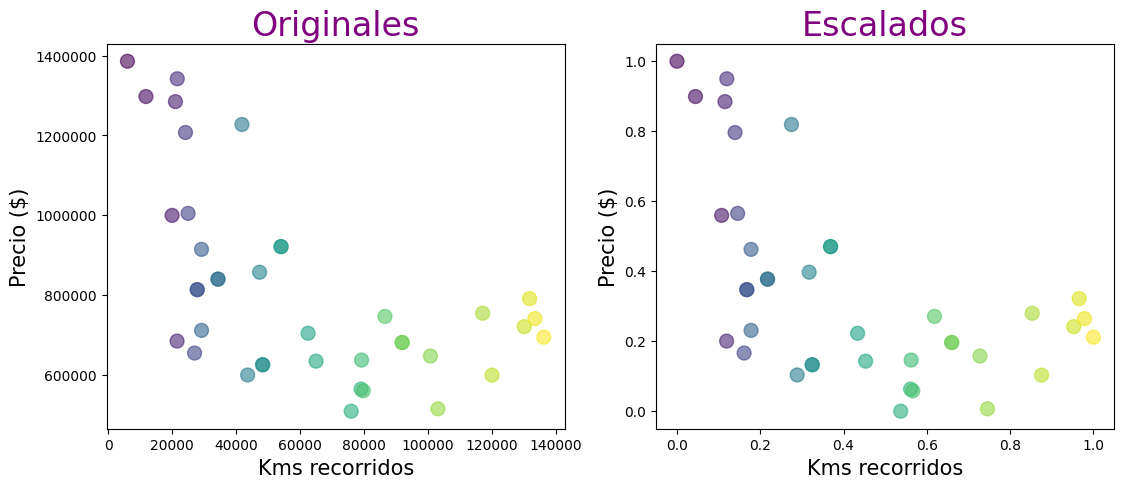

In [13]:
# Gráfica de los datos crudos: km vs precio
fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)

ax.scatter(carros["kms"], carros["precio"], marker=".",
           s=400, c=range(carros["kms"].size), alpha=0.6)

ax.set_title("Originales", size=24, color="purple")
ax.set_ylabel("Precio ($)", size=15)
ax.set_xlabel("Kms recorridos", size=15)
ax.ticklabel_format(style="plain")

# Escalamiento de los datos
escala_kms = preprocessing.MinMaxScaler()
escala_precio = preprocessing.MinMaxScaler()
kms = escala_kms.fit_transform(carros["kms"].values.reshape(-1, 1))
precio = escala_precio.fit_transform(carros["precio"].values.reshape(-1, 1))

# Graficar datos escalados: kms vs precio
ax = fig.add_subplot(1, 2, 2)

ax.scatter(kms, precio, marker=".", 
           s=400, c=range(kms.size), alpha=0.6)

ax.set_title("Escalados", size=24, color="purple")
ax.set_ylabel("Precio ($)", size=15)
ax.set_xlabel("Kms recorridos", size=15)
ax.ticklabel_format(style="plain")

plt.show()

# Creación del Modelo KNN - Regresión

In [14]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(kms, precio)

# Probamos el modelo
kms_instancia = escala_kms.transform([[20000]])
precio_instancia = knn.predict(kms_instancia)
escala_precio.inverse_transform(precio_instancia)

array([[990048.]])

# Precios de Carros de 0 a 140.000 Kms

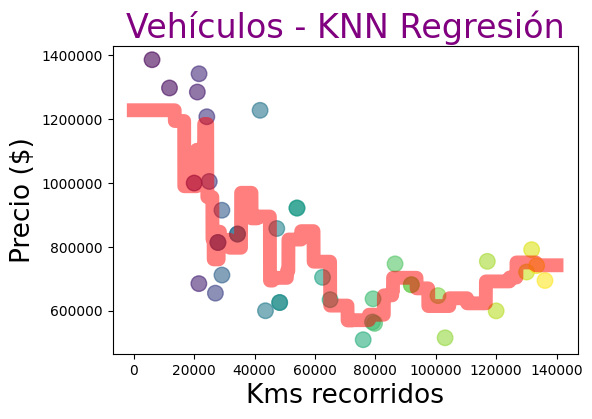

In [17]:
# Múltiples regresiones de los valores dentro del rango
kms_instancias = escala_kms.transform(np.arange(140000).reshape(-1, 1))
precio_instancias = knn.predict(kms_instancias)
todas = escala_precio.inverse_transform(precio_instancias)
todas = todas.reshape(1, -1)

# Graficar los resultados de las múltiples regresiones
fig = plt.figure(figsize=(6, 4))

plt.plot(np.arange(140000), todas.reshape(1, -1)[0], 
        linewidth=10, color="red", alpha=0.5)

plt.scatter(carros["kms"], carros["precio"], marker=".",
            s=500, c=range(carros["kms"].size), alpha=0.6)

plt.title("Vehículos - KNN Regresión", size=24, color="purple")
plt.ylabel("Precio ($)", size=19)
plt.xlabel("Kms recorridos", size=19)
plt.ticklabel_format(style="plain")
plt.show()